In [127]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [128]:
scan_1 = Image.open("C:/Users/timcy/Documents/Code/Personal/U-Net/data/scans/bjorke_1.png")
# C:\Users\timcy\Documents\Code\Personal\U-Net\data\scans\bjorke_1.png

In [ ]:
import os

# Directory containing the scans
scans_dir = "C:/Users/timcy/Documents/Code/Personal/U-Net/data/scans/"
masks_dir = "C:/Users/timcy/Documents/Code/Personal/U-Net/data/masks/"

# List to store the paths of all png files
scans = []
masks = []

# Iterate over all files in the directory
for filename in tqdm(os.listdir(scans_dir)):
    # if filename.endswith(".png"):
    # Construct the full path and add the image to the list
    scans.append(np.array(Image.open(os.path.join(scans_dir, filename))))
    masks.append(np.array(Image.open(os.path.join(masks_dir, filename))))

In [ ]:
scans[0].shape

In [ ]:
print(len(scans))
print(len(masks))

In [ ]:
np.mean(masks)

In [ ]:
mask_coverages = []
zero_masks = []

for mask in tqdm(masks):
    # Calculate the mask coverage as a percentage
    mask_coverage = np.mean(mask) / 2.55
    mask_coverages.append(mask_coverage)
    if mask_coverage == 0:
        zero_masks.append(mask)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(mask_coverages, bins=100)
plt.title('Histogram of Mask Coverages %')
plt.xlabel('Mask Coverage %')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(len(mask_coverages))
print(len(zero_masks))

In [114]:
df = pd.DataFrame({"scan": scans, "mask": masks, "mask_coverage": mask_coverages})

In [ ]:
df.describe()

In [ ]:
Image.fromarray(list(df.loc[df["mask_coverage"] < 0.00001, "scan"])[0])

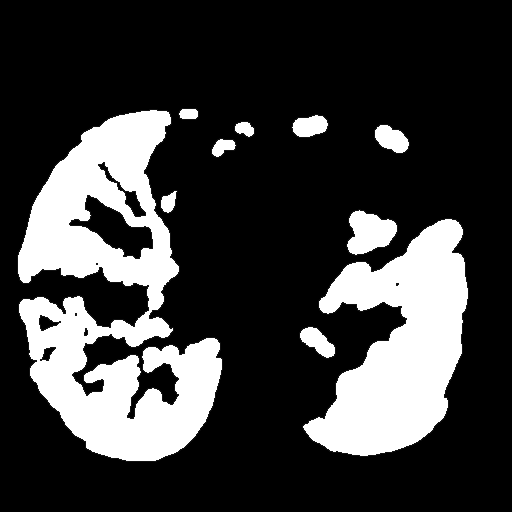

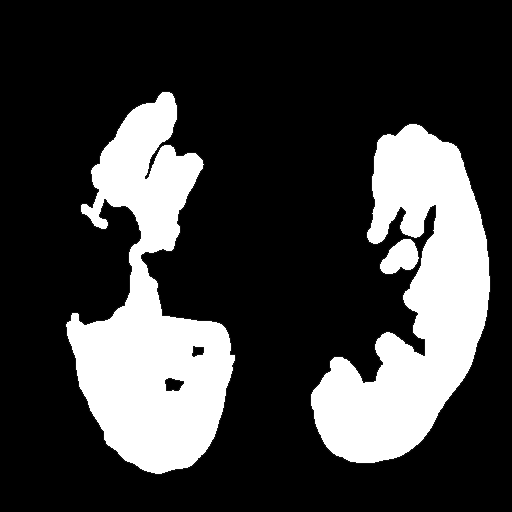

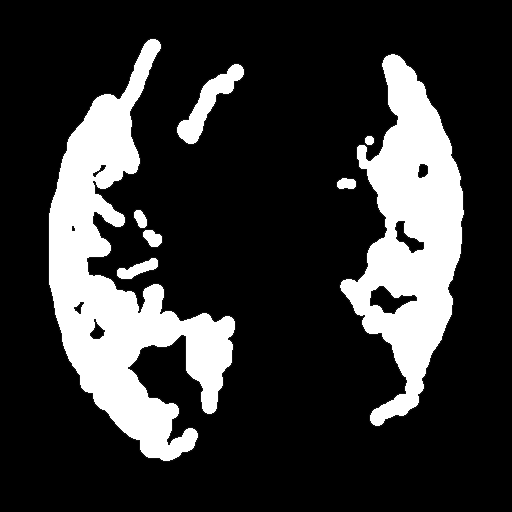

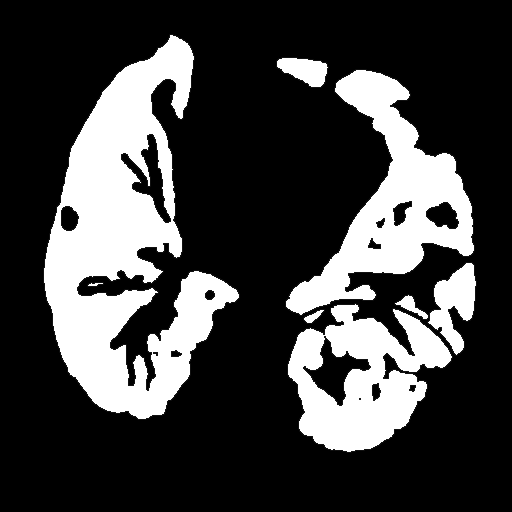

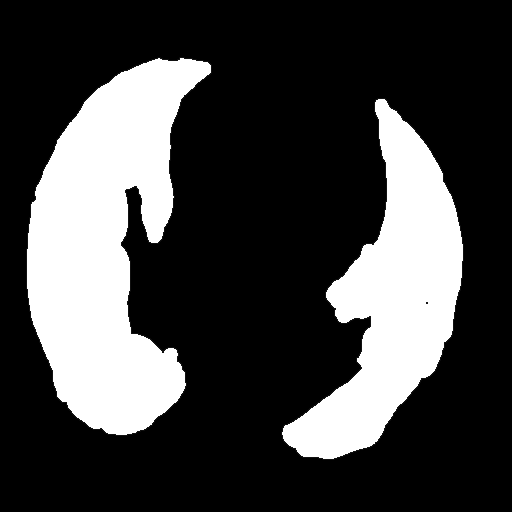

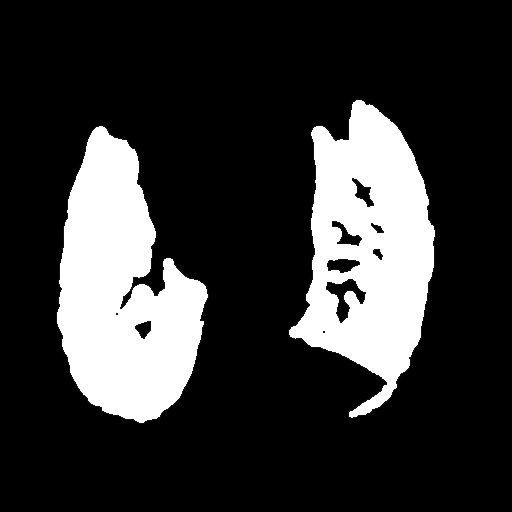

In [126]:
for img in list(df.loc[df["mask_coverage"] > 20, "mask"]):
    display(Image.fromarray(img))

# Overlaying

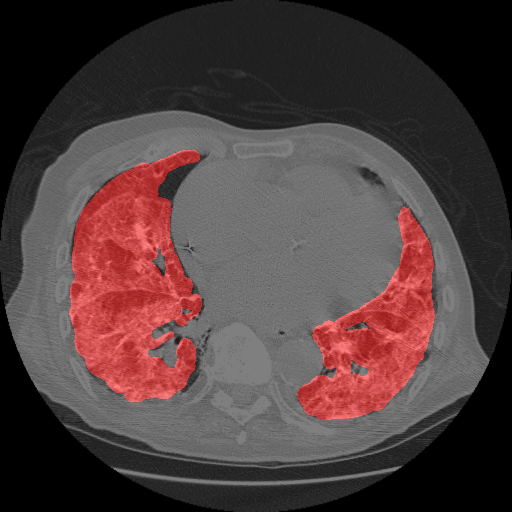

In [166]:
green_mask = masks[0].copy()
green_mask[:, :, 1] = 0
green_mask[:, :, 2] = 0

scan = Image.fromarray(scans[0]).convert('RGBA')
mask = Image.fromarray(green_mask).convert('RGBA')

Image.blend(scan, mask, 0.5)